In [1]:
#Loading Transformers
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 7.5 MB/s 
     |████████████████████████████████| 120 kB 41.6 MB/s 
     |████████████████████████████████| 6.6 MB 55.3 MB/s 


In [2]:
! pip install rouge-score nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24955 sha256=41fb8e1a27adc70b84d2f74a013df86fa65da9b6aac088ec33bb8aac2e302459
  Stored in directory: /root/.cache/pip/wheels/84/ac/6b/38096e3c5bf1dc87911e3585875e21a3ac610348e740409c76
Successfully built rouge-score


In [3]:
#loading PyTorch
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 8.5 MB/s 


In [5]:
import torch

In [ ]:
#model_checkpoint = "t5-small"

**Loading Dataset from HuggingFace**

In [6]:
!pip install datasets
from datasets import load_dataset
dataset = load_dataset("cnn_dailymail", "3.0.0")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 9.0 MB/s 
     |████████████████████████████████| 115 kB 61.8 MB/s 
     |████████████████████████████████| 212 kB 45.6 MB/s 
     |████████████████████████████████| 127 kB 43.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

**Estimate average length of Text and Summary**

In [ ]:
tiny_dataset = dataset['train'].select(list(range(0, 100)))
text_len = []
summary_len=[]

In [ ]:
for i in range(len(tiny_dataset)):
    example = tiny_dataset[i]
    text_example = example['article']
    text_example = text_example.replace('\n','')
    text_words = text_example.split()
    text_len.append(len(text_words))
    summary_example = example['highlights']
    summary_example = summary_example.replace('\n','')
    summary_words = summary_example.split()
    summary_len.append(len(summary_words))

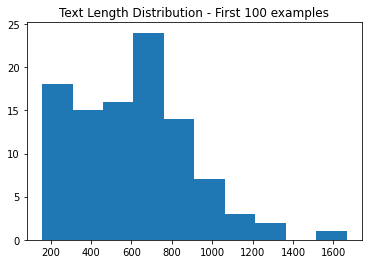

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(text_len)
plt.title('Text Length Distribution - First 100 examples')
plt.show()

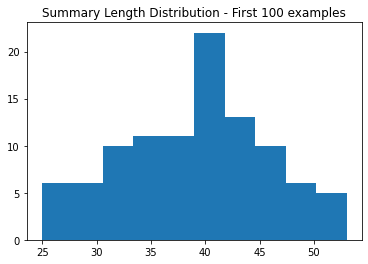

In [ ]:
plt.hist(summary_len)
plt.title('Summary Length Distribution - First 100 examples')
plt.show()

In [ ]:
print("Average Length of text: ", sum(text_len)/len(text_len))

Average Length of text:  605.13


In [ ]:
print("Average Length of Summary: ", sum(summary_len)/len(summary_len))

Average Length of Summary:  38.97


**Loading the Metric**

In [7]:
from datasets import load_metric
metric = load_metric("rouge")

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [ ]:
metric

Metric(name: "rouge", features: {'predictions': Value(dtype='string', id='sequence'), 'references': Value(dtype='string', id='sequence')}, usage: """
Calculates average rouge scores for a list of hypotheses and references
Args:
    predictions: list of predictions to score. Each prediction
        should be a string with tokens separated by spaces.
    references: list of reference for each prediction. Each
        reference should be a string with tokens separated by spaces.
    rouge_types: A list of rouge types to calculate.
        Valid names:
        `"rouge{n}"` (e.g. `"rouge1"`, `"rouge2"`) where: {n} is the n-gram based scoring,
        `"rougeL"`: Longest common subsequence based scoring.
        `"rougeLSum"`: rougeLsum splits text using `"
"`.
        See details in https://github.com/huggingface/datasets/issues/617
    use_stemmer: Bool indicating whether Porter stemmer should be used to strip word suffixes.
    use_aggregator: Return aggregates if this is set to True
Retu

**Inspect the cnn_dailymail Dataset**

In [ ]:
from datasets import get_dataset_config_names

configs = get_dataset_config_names("cnn_dailymail")
print(configs)

['3.0.0', '1.0.0', '2.0.0']


In [ ]:
from datasets import get_dataset_split_names

get_dataset_split_names("cnn_dailymail", "3.0.0")
['train', 'validation', 'test']

['train', 'validation', 'test']

In [9]:
dataset['train']['highlights']

["Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .\nYoung actor says he has no plans to fritter his cash away .\nRadcliffe's earnings from first five Potter films have been held in trust fund .",
 'Mentally ill inmates in Miami are housed on the "forgotten floor"\nJudge Steven Leifman says most are there as a result of "avoidable felonies"\nWhile CNN tours facility, patient shouts: "I am the son of the president"\nLeifman says the system is unjust and he\'s fighting for change .',
 'NEW: "I thought I was going to die," driver says .\nMan says pickup truck was folded in half; he just has cut on face .\nDriver: "I probably had a 30-, 35-foot free fall"\nMinnesota bridge collapsed during rush hour Wednesday .',
 'Five small polyps found during procedure; "none worrisome," spokesman says .\nPresident reclaims powers transferred to vice president .\nBush undergoes routine colonoscopy at Camp David .',
 "NEW: NFL chief, Atlanta Falcons owner critical of Michael Vi

In [ ]:
dataset['train'][0]

{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

**Cleaning the Data**

**1. Removing Unicode Characters**

In [10]:
def clean(row):
  row["article"] = row["article"].replace('\n',' ').replace('\t',' ')\
                               .replace(',','').replace('\'','').replace('""',' ')
  row["article"] = " ".join(row["article"].split())  
  row["highlights"] = row["highlights"].replace('&lt;','<').replace('&gt;','>').replace('\n',' ').replace('\t',' ') 
  return row  

In [11]:
dataset_clean=dataset.map(clean)

  0%|          | 0/287113 [00:00<?, ?ex/s]

  0%|          | 0/13368 [00:00<?, ?ex/s]

  0%|          | 0/11490 [00:00<?, ?ex/s]

In [ ]:
dataset['train'][0]

{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

In [ ]:
dataset_clean['train'][0]

{'article': 'LONDON England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday but he insists the money wont cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world the young actor says he has no plans to fritter his cash away on fast cars drink and celebrity parties. "I dont plan to be one of those people who as soon as they turn 18 suddenly buy themselves a massive sports car collection or something similar" he told an Australian interviewer earlier this month. "I dont think Ill be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18 Radcliffe will be able to gamble in a casino buy a drink in a pub or see the horror film "Hostel: Part II" currently six places below his number one movie on the UK box office chart. Details of how 

2. Removing Stopwords

In [12]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
def remove_stopwords(row):
  row["article"] = " ".join([word for word in row["article"].split() if word not in (stop)])
  row["highlights"] =" ".join([word for word in row["highlights"].split() if word not in (stop)]) 
  return row 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
dataset_clean=dataset.map(remove_stopwords)

  0%|          | 0/287113 [00:00<?, ?ex/s]

  0%|          | 0/13368 [00:00<?, ?ex/s]

  0%|          | 0/11490 [00:00<?, ?ex/s]

# **MODEL 1. T5(Text to Text Transformer Model)**

**Import T5 Model and T5 Tokenizer from Hugging Face**

In [ ]:
from transformers import AutoTokenizer
    
tokenizer = AutoTokenizer.from_pretrained('t5-small')

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5_fast.py:166: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


In [ ]:
prefix = "summarize: "


def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["article"]]
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples["highlights"], max_length=128, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
preprocess_function(dataset_clean['train'][0])

{'input_ids': [[21603, 10, 301, 1], [21603, 10, 411, 1], [21603, 10, 445, 1], [21603, 10, 309, 1], [21603, 10, 411, 1], [21603, 10, 445, 1], [21603, 10, 1], [21603, 10, 262, 1], [21603, 10, 3, 29, 1], [21603, 10, 3, 122, 1], [21603, 10, 3, 40, 1], [21603, 10, 3, 9, 1], [21603, 10, 3, 29, 1], [21603, 10, 3, 26, 1], [21603, 10, 1], [21603, 10, 41, 1], [21603, 10, 391, 1], [21603, 10, 3, 15, 1], [21603, 10, 3, 76, 1], [21603, 10, 3, 17, 1], [21603, 10, 3, 15, 1], [21603, 10, 3, 52, 1], [21603, 10, 3, 7, 1], [21603, 10, 3, 61, 1], [21603, 10, 1], [21603, 10, 3, 18, 1], [21603, 10, 3, 18, 1], [21603, 10, 1], [21603, 10, 454, 1], [21603, 10, 3, 9, 1], [21603, 10, 3, 52, 1], [21603, 10, 3, 52, 1], [21603, 10, 3, 63, 1], [21603, 10, 1], [21603, 10, 276, 1], [21603, 10, 3, 32, 1], [21603, 10, 3, 17, 1], [21603, 10, 3, 17, 1], [21603, 10, 3, 15, 1], [21603, 10, 3, 52, 1], [21603, 10, 1], [21603, 10, 3, 7, 1], [21603, 10, 3, 17, 1], [21603, 10, 3, 9, 1], [21603, 10, 3, 52, 1], [21603, 10, 1], [21

In [ ]:
tokenized_clean_datasets = dataset_clean.map(preprocess_function, batched=True)

  0%|          | 0/288 [00:00<?, ?ba/s]

  0%|          | 0/14 [00:00<?, ?ba/s]

  0%|          | 0/12 [00:00<?, ?ba/s]

In [ ]:
small_train_clean_dataset = tokenized_clean_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_clean_dataset = tokenized_clean_datasets["validation"].shuffle(seed=42).select(range(1000))

**Fine Tuning the model**

In [ ]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = AutoModelForSeq2SeqLM.from_pretrained('t5-small')

In [ ]:
#model = T5ForConditionalGeneration.from_pretrained('t5-small')

**Training hyperparameters**

In [ ]:
#from transformers import TrainingArguments,Trainer

#training_args = TrainingArguments(output_dir="test_trainer")

In [ ]:
batch_size = 16
#model_name = model_checkpoint.split("/")[-1]
training_args = Seq2SeqTrainingArguments(
    #f"{model_name}-finetuned-xsum",
    output_dir="test_trainer",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=1,
    predict_with_generate=True,
    #fp16=True,
    #push_to_hub=True,
)

In [ ]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
import nltk
import numpy as np
nltk.download('punkt')
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them.
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    
    # Rouge expects a newline after each sentence
    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]
    
    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    # Extract a few results
    result = {key: value.mid.fmeasure * 100 for key, value in result.items()}
    
    # Add mean generated length
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)
    
    return {k: round(v, 4) for k, v in result.items()}

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Make the trainer for small dataset with noise free data**

In [ ]:
trainer = Seq2SeqTrainer(
    #model,
    model=model,
    args=training_args,
    #train_dataset=tokenized_datasets["train"],
    train_dataset=small_train_clean_dataset, 
    eval_dataset=small_eval_clean_dataset,
    #eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `T5ForConditionalGeneration.forward` and have been ignored: article, highlights, id. If article, highlights, id are not expected by `T5ForConditionalGeneration.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1000
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 63


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,No log,2.124903,24.716000,11.803500,20.518400,23.188700,19.000000


The following columns in the evaluation set don't have a corresponding argument in `T5ForConditionalGeneration.forward` and have been ignored: article, highlights, id. If article, highlights, id are not expected by `T5ForConditionalGeneration.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1000
  Batch size = 16


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=63, training_loss=2.37881348625062, metrics={'train_runtime': 103.2078, 'train_samples_per_second': 9.689, 'train_steps_per_second': 0.61, 'total_flos': 270683602944000.0, 'train_loss': 2.37881348625062, 'epoch': 1.0})

**Make the trainer for entire dataset with noise free data**

In [ ]:
trainer = Seq2SeqTrainer(
    #model,
    model=model,
    args=training_args,
    train_dataset=tokenized_clean_datasets["train"],
    #train_dataset=small_train_dataset, 
    #eval_dataset=small_eval_dataset,
    eval_dataset=tokenized_clean_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `T5ForConditionalGeneration.forward` and have been ignored: article, highlights, id. If article, highlights, id are not expected by `T5ForConditionalGeneration.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 287113
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 17945


Epoch,Training Loss,Validation Loss


Saving model checkpoint to test_trainer/checkpoint-500
Configuration saved in test_trainer/checkpoint-500/config.json
Model weights saved in test_trainer/checkpoint-500/pytorch_model.bin
tokenizer config file saved in test_trainer/checkpoint-500/tokenizer_config.json
Special tokens file saved in test_trainer/checkpoint-500/special_tokens_map.json
Copy vocab file to test_trainer/checkpoint-500/spiece.model
Saving model checkpoint to test_trainer/checkpoint-1000
Configuration saved in test_trainer/checkpoint-1000/config.json
Model weights saved in test_trainer/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in test_trainer/checkpoint-1000/tokenizer_config.json
Special tokens file saved in test_trainer/checkpoint-1000/special_tokens_map.json
Copy vocab file to test_trainer/checkpoint-1000/spiece.model
Saving model checkpoint to test_trainer/checkpoint-1500
Configuration saved in test_trainer/checkpoint-1500/config.json
Model weights saved in test_trainer/checkpoint-1500/pyto

Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum,Gen Len
1,1.888500,1.721293,24.466000,11.576400,20.177400,23.055000,18.999400


Saving model checkpoint to test_trainer/checkpoint-7000
Configuration saved in test_trainer/checkpoint-7000/config.json
Model weights saved in test_trainer/checkpoint-7000/pytorch_model.bin
tokenizer config file saved in test_trainer/checkpoint-7000/tokenizer_config.json
Special tokens file saved in test_trainer/checkpoint-7000/special_tokens_map.json
Copy vocab file to test_trainer/checkpoint-7000/spiece.model
Deleting older checkpoint [test_trainer/checkpoint-5500] due to args.save_total_limit
Saving model checkpoint to test_trainer/checkpoint-7500
Configuration saved in test_trainer/checkpoint-7500/config.json
Model weights saved in test_trainer/checkpoint-7500/pytorch_model.bin
tokenizer config file saved in test_trainer/checkpoint-7500/tokenizer_config.json
Special tokens file saved in test_trainer/checkpoint-7500/special_tokens_map.json
Copy vocab file to test_trainer/checkpoint-7500/spiece.model
Deleting older checkpoint [test_trainer/checkpoint-6000] due to args.save_total_limi

TrainOutput(global_step=17945, training_loss=1.9102447195151417, metrics={'train_runtime': 14829.4507, 'train_samples_per_second': 19.361, 'train_steps_per_second': 1.21, 'total_flos': 7.771173135109325e+16, 'train_loss': 1.9102447195151417, 'epoch': 1.0})

# **MODEL 2. BART**

**Loading Model and Tokenizer**

In [12]:
from transformers import AutoTokenizer
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer
model_name = "facebook/bart-large-xsum"

model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Set model parameters or use the default
# print(model.config)

# tokenization
encoder_max_length = 1024  # demo
decoder_max_length = 64

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Downloading:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

**Preprocess and tokenize** 

In [17]:
def batch_tokenize_preprocess(batch, tokenizer, max_source_length, max_target_length):
    source, target = batch["article"], batch["highlights"]
    source_tokenized = tokenizer(
        source, padding="max_length", truncation=True, max_length=max_source_length
    )
    target_tokenized = tokenizer(
        target, padding="max_length", truncation=True, max_length=max_target_length
    )

    batch = {k: v for k, v in source_tokenized.items()}
    # Ignore padding in the loss
    batch["labels"] = [
        [-100 if token == tokenizer.pad_token_id else token for token in l]
        for l in target_tokenized["input_ids"]
    ]
    return batch


train_data = dataset_clean['train'].map(
    lambda batch: batch_tokenize_preprocess(
        batch, tokenizer, encoder_max_length, decoder_max_length
    ),
    batched=True,
    #remove_columns=train_data_txt.column_names,
)

validation_data = dataset_clean['validation'].map(
    lambda batch: batch_tokenize_preprocess(
        batch, tokenizer, encoder_max_length, decoder_max_length
    ),
    batched=True,
    #remove_columns=validation_data_txt.column_names,
)    

  0%|          | 0/288 [00:00<?, ?ba/s]

  0%|          | 0/14 [00:00<?, ?ba/s]

In [19]:
small_train_clean_dataset = train_data.shuffle(seed=42).select(range(1000))
small_eval_clean_dataset = validation_data.shuffle(seed=42).select(range(1000))

**Metrics**

In [18]:
def postprocess_text(preds, labels):
    preds = [pred.strip() for pred in preds]
    labels = [label.strip() for label in labels]

    # rougeLSum expects newline after each sentence
    preds = ["\n".join(nltk.sent_tokenize(pred)) for pred in preds]
    labels = ["\n".join(nltk.sent_tokenize(label)) for label in labels]

    return preds, labels


def compute_metrics(eval_preds):
    preds, labels = eval_preds
    if isinstance(preds, tuple):
        preds = preds[0]
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    # Replace -100 in the labels as we can't decode them.
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Some simple post-processing
    decoded_preds, decoded_labels = postprocess_text(decoded_preds, decoded_labels)

    result = metric.compute(
        predictions=decoded_preds, references=decoded_labels, use_stemmer=True
    )
    # Extract a few results from ROUGE
    result = {key: value.mid.fmeasure * 100 for key, value in result.items()}

    prediction_lens = [
        np.count_nonzero(pred != tokenizer.pad_token_id) for pred in preds
    ]
    result["gen_len"] = np.mean(prediction_lens)
    result = {k: round(v, 4) for k, v in result.items()}
    return result

**Training Arguments**

In [20]:
training_args = Seq2SeqTrainingArguments(
    output_dir="results",
    num_train_epochs=1,  # demo
    do_train=True,
    do_eval=True,
    per_device_train_batch_size=4,  # demo
    per_device_eval_batch_size=4,
    # learning_rate=3e-05,
    warmup_steps=500,
    weight_decay=0.1,
    label_smoothing_factor=0.1,
    predict_with_generate=True,
    logging_dir="logs",
    logging_steps=50,
    save_total_limit=3,
)

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=small_train_clean_dataset,
    eval_dataset=small_eval_clean_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

**Train the model**

In [21]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BartForConditionalGeneration.forward` and have been ignored: id, article, highlights. If id, article, highlights are not expected by `BartForConditionalGeneration.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1000
  Num Epochs = 1
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 1
  Total optimization steps = 250
You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode 

Step,Training Loss
50,4.802200
100,4.037900
150,3.912100
200,3.886500
250,3.919900




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=250, training_loss=4.111709411621094, metrics={'train_runtime': 443.3199, 'train_samples_per_second': 2.256, 'train_steps_per_second': 0.564, 'total_flos': 2167104602112000.0, 'train_loss': 4.111709411621094, 'epoch': 1.0})

# **MODEL 3.PEGASUS**

**Making small training set from dataset**

In [15]:
small_train_clean_dataset = dataset_clean["train"].shuffle(seed=42).select(range(1000))
small_eval_clean_dataset = dataset_clean["train"].shuffle(seed=42).select(range(1000))

In [16]:

train_texts, train_labels = dataset_clean['train']['article'][:1000], dataset_clean['train']['highlights'][:1000]

In [23]:
val_texts, val_labels=dataset_clean['validation']['article'][:1000], dataset_clean['validation']['highlights'][:1000]

In [24]:
test_texts, test_labels=dataset_clean['test']['article'][:1000], dataset_clean['test']['highlights'][:1000]

**Import and Load Model**

In [17]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer, Trainer, TrainingArguments

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [18]:
# Load tokenizer 
tokenizer = PegasusTokenizer.from_pretrained("google/pegasus-xsum")

Downloading:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

In [19]:
# Load model 
model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-xsum")

Downloading:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

In [20]:
class PegasusDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels['input_ids'][idx])  # torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels['input_ids'])  # len(self.labels)

In [38]:
def prepare_data(model_name, 
                 train_texts, train_labels, 
                 val_texts=None, val_labels=None, 
                 test_texts=None, test_labels=None):
  """
  Prepare input data for model fine-tuning
  """
  tokenizer = PegasusTokenizer.from_pretrained(model_name)

  prepare_val = False if val_texts is None or val_labels is None else True
  prepare_test = False if test_texts is None or test_labels is None else True

  def tokenize_data(texts, labels):
    encodings = tokenizer(texts, truncation=True, padding=True)
    decodings = tokenizer(labels, truncation=True, padding=True)
    dataset_tokenized = PegasusDataset(encodings, decodings)
    return dataset_tokenized

  train_dataset = tokenize_data(train_texts, train_labels)
  val_dataset = tokenize_data(val_texts, val_labels) if prepare_val else None
  test_dataset = tokenize_data(test_texts, test_labels) if prepare_test else None

  return train_dataset, val_dataset, test_dataset, tokenizer

  

In [ ]:
#train_dataset = tokenize_data(dataset['train'], dataset['train']['highlights'])
#val_dataset = tokenize_data(dataset['validation'], dataset['validation']['highlights']) if prepare_val else None
#test_dataset = tokenize_data(test_texts, test_labels) if prepare_test else None


In [46]:
def prepare_fine_tuning(model_name, tokenizer, train_dataset, val_dataset=None, freeze_encoder=False, output_dir='./results'):
  """
  Prepare configurations and base model for fine-tuning
  """
  torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
  model = PegasusForConditionalGeneration.from_pretrained(model_name).to(torch_device)

  if freeze_encoder:
    for param in model.model.encoder.parameters():
      param.requires_grad = False

  if val_dataset is not None:
    training_args = TrainingArguments(
      output_dir=output_dir,           # output directory
      num_train_epochs=2000,           # total number of training epochs
      per_device_train_batch_size=1,   # batch size per device during training, can increase if memory allows
      per_device_eval_batch_size=1,    # batch size for evaluation, can increase if memory allows
      save_steps=500,                  # number of updates steps before checkpoint saves
      save_total_limit=5,              # limit the total amount of checkpoints and deletes the older checkpoints
      evaluation_strategy='steps',     # evaluation strategy to adopt during training
      eval_steps=100,                  # number of update steps before evaluation
      warmup_steps=500,                # number of warmup steps for learning rate scheduler
      weight_decay=0.01,               # strength of weight decay
      logging_dir='./logs',            # directory for storing logs
      logging_steps=10,
    )

    trainer = Trainer(
      model=model,                         # the instantiated 🤗 Transformers model to be trained
      args=training_args,                  # training arguments, defined above
      train_dataset=train_dataset,         # training dataset
      eval_dataset=val_dataset,            # evaluation dataset
      tokenizer=tokenizer
    )

  else:
    training_args = TrainingArguments(
      output_dir=output_dir,           # output directory
      num_train_epochs=2000,           # total number of training epochs
      per_device_train_batch_size=1,   # batch size per device during training, can increase if memory allows
      save_steps=500,                  # number of updates steps before checkpoint saves
      save_total_limit=5,              # limit the total amount of checkpoints and deletes the older checkpoints
      warmup_steps=500,                # number of warmup steps for learning rate scheduler
      weight_decay=0.01,               # strength of weight decay
      logging_dir='./logs',            # directory for storing logs
      logging_steps=10,
    )

    trainer = Trainer(
      model=model,                         # the instantiated 🤗 Transformers model to be trained
      args=training_args,                  # training arguments, defined above
      train_dataset=train_dataset,         # training dataset
      tokenizer=tokenizer
    )

  return trainer

if __name__=='__main__':
  # use XSum dataset as example, with first 1000 docs as training data
  #from datasets import load_dataset
  #dataset = load_dataset("xsum")
  train_texts, train_labels = dataset_clean['train']['article'][:1000], dataset_clean['train']['highlights'][:1000]
  
  # use Pegasus Large model as base for fine-tuning
  model_name = 'google/pegasus-large'
  train_dataset, _, _, tokenizer = prepare_data(model_name, train_texts, train_labels)
  trainer = prepare_fine_tuning(model_name, tokenizer, train_dataset)
  trainer.train()
  
  
 

Downloading:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.09k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1000
  Num Epochs = 2000
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & accumulation) = 1
  Gradient Accumulation steps = 1
  Total optimization steps = 2000000


Step,Training Loss
10,8.061600
20,8.079700
30,8.093800
40,8.072600
50,8.439500
60,7.526400
70,7.667700
80,7.666300
90,7.819500
100,8.045900


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
tokenizer config file saved in ./results/checkpoint-500/tokenizer_config.json
Special tokens file saved in ./results/checkpoint-500/special_tokens_map.json


KeyboardInterrupt: ignored